In [93]:
#Dependencies
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as st
import datetime as dt
import requests
import squarify
import seaborn as sns

#citipy to determine the cities based on latitude and longitude
from citipy import citipy



In [94]:
%%html

<img src="https://cdn.vox-cdn.com/thumbor/ScXzGQ8lrcWwmyFEyuCWvqtTjPE=/0x0:2040x1360/1200x628/filters:focal(1020x680:1021x681)/cdn.vox-cdn.com/uploads/chorus_asset/file/23951360/STK072_VRG_Illo_N_Barclay_8_netflix.jpg">

In [95]:
#Read in the csv file
df=pd.read_csv("static/Resources/netflix_titles.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [96]:
titles_df = df[["title", "country", "release_year", "listed_in", "type"]]

titles_df.head()

,title,country,release_year,listed_in,type
0,Dick Johnson Is Dead,United States,2020,Documentaries,Movie
1,Blood & Water,South Africa,2021,"International TV Shows, TV Dramas, TV Mysteries",TV Show
2,Ganglands,NaN,2021,"Crime TV Shows, International TV Shows, TV Act...",TV Show
3,Jailbirds New Orleans,NaN,2021,"Docuseries, Reality TV",TV Show
4,Kota Factory,India,2021,"International TV Shows, Romantic TV Shows, TV ...",TV Show


In [97]:
titles_df = titles_df.rename(columns={"title" : "Title", "country" : "Country", "release_year" : "Release Year", "listed_in" : "Genre", "type" : "Type"})

titles_df.head()

,Title,Country,Release Year,Genre,Type
0,Dick Johnson Is Dead,United States,2020,Documentaries,Movie
1,Blood & Water,South Africa,2021,"International TV Shows, TV Dramas, TV Mysteries",TV Show
2,Ganglands,NaN,2021,"Crime TV Shows, International TV Shows, TV Act...",TV Show
3,Jailbirds New Orleans,NaN,2021,"Docuseries, Reality TV",TV Show
4,Kota Factory,India,2021,"International TV Shows, Romantic TV Shows, TV ...",TV Show


In [98]:
#Type of contents
type = titles_df["Type"].value_counts()
type

Type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [99]:
#count by country

titles_df["Country"].value_counts()

Country
United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64

In [100]:
#count by released year

titles_df["Release Year"].value_counts()

Release Year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: count, Length: 74, dtype: int64

In [101]:
#Genre and corresponding number of contents
titles_df["Genre"].value_counts()

Genre
Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: count, Length: 514, dtype: int64

These following counts were completed with explode function

In [102]:
#Documentaries count
titles_exp = titles_df.explode("Genre")
genre_counts = titles_exp["Genre"].value_counts()
docs = genre_counts["Documentaries"]

print(docs)

359


In [103]:
#Comedies count
titles_exp = titles_df.explode("Genre")
genre_counts = titles_exp["Genre"].value_counts()
comedies = genre_counts["Comedies"]

print(comedies)

110


In [104]:
#Dramas count

titles_exp = titles_df.explode("Genre")
genre_counts = titles_exp["Genre"].value_counts()
dramas = genre_counts["Dramas"]

print(dramas)

138


In [105]:
#Thrillers count

titles_exp = titles_df.explode("Genre")
genre_counts = titles_exp["Genre"].value_counts()
thrillers = genre_counts["Thrillers"]

print(thrillers)

65


In [106]:
#count for action and adventure

titles_exp = titles_df.explode("Genre")
genre_counts = titles_exp["Genre"].value_counts()
AA = genre_counts["Action & Adventure"]

print(AA)

128


In [107]:
#count for sci-fi/fantasy

titles_exp = titles_df.explode("Genre")
genre_counts = titles_exp["Genre"].value_counts()
scif = genre_counts["Sci-Fi & Fantasy"]

print(scif)

1


In [108]:
#count for reality tv

titles_exp = titles_df.explode("Genre")
genre_counts = titles_exp["Genre"].value_counts()
reality = genre_counts["Reality TV"]

print(reality)

95


In [109]:
#Type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [110]:
#Read second csv file

df_2=pd.read_csv("static/Resources/netflix_userbase.csv")
df_2

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


In [111]:
#Drop unneeded columns
netflix_df = df_2[["Country","Device", "Subscription Type","Age","Gender","Monthly Revenue"]]

netflix_df.head()

,Country,Device,Subscription Type,Age,Gender,Monthly Revenue
0,United States,Smartphone,Basic,28,Male,10
1,Canada,Tablet,Premium,35,Female,15
2,United Kingdom,Smart TV,Standard,42,Male,12
3,Australia,Laptop,Standard,51,Female,12
4,Germany,Smartphone,Basic,33,Male,10


In [112]:
#Rename "Monthly Revenue" column to "Monthly Cost"

netflix_df = netflix_df.rename(columns={"Monthly Revenue" : "Monthly Cost"})

netflix_df.head()

,Country,Device,Subscription Type,Age,Gender,Monthly Cost
0,United States,Smartphone,Basic,28,Male,10
1,Canada,Tablet,Premium,35,Female,15
2,United Kingdom,Smart TV,Standard,42,Male,12
3,Australia,Laptop,Standard,51,Female,12
4,Germany,Smartphone,Basic,33,Male,10


In [113]:
# Sort by Countries
netflix_df = netflix_df.sort_values("Country")

netflix_df.head()

,Country,Device,Subscription Type,Age,Gender,Monthly Cost
1018,Australia,Tablet,Standard,27,Female,14
313,Australia,Laptop,Basic,28,Male,10
403,Australia,Smartphone,Premium,28,Male,13
928,Australia,Smart TV,Premium,44,Male,13
1828,Australia,Tablet,Premium,36,Female,13


In [114]:
#NUmber of Netflix users per countries in the dataset
country_counts = netflix_df["Country"].value_counts()
country_counts

Country
Spain             451
United States     451
Canada            317
Australia         183
Brazil            183
France            183
Germany           183
Italy             183
Mexico            183
United Kingdom    183
Name: count, dtype: int64

In [115]:
#Number of users per device in dataset
device_counts = netflix_df["Device"].value_counts()
device_counts

Device
Laptop        636
Tablet        633
Smartphone    621
Smart TV      610
Name: count, dtype: int64

In [116]:
#Number of users  for each Subscription Type
subscription_type = netflix_df["Subscription Type"].value_counts()
subscription_type

Subscription Type
Basic       999
Standard    768
Premium     733
Name: count, dtype: int64

In [117]:
#Gender counts
gender_count = netflix_df["Gender"].value_counts()
gender_count

Gender
Female    1257
Male      1243
Name: count, dtype: int64

In [118]:
#Age counts
age_count = netflix_df["Age"].value_counts()
age_count

Age
30    116
39    116
28    115
31    115
41    114
47    111
37    107
35    105
29    104
40    103
42    102
48    101
46     99
36     99
49     97
43     94
51     93
33     93
32     92
45     89
38     89
34     88
27     87
44     86
50     84
26      1
Name: count, dtype: int64

In [119]:
#Accumulated Monthly costs 
monthly_cost = netflix_df["Monthly Cost"].value_counts()
monthly_cost

Monthly Cost
12    455
14    431
13    418
10    409
15    399
11    388
Name: count, dtype: int64

In [120]:
# Device count in the US
us_data = netflix_df[netflix_df["Country"] == "United States"]
us_device = us_data["Device"].value_counts()

us_device.head()

Device
Laptop        121
Smart TV      116
Tablet        115
Smartphone     99
Name: count, dtype: int64

In [121]:
#Subscription costs in the US
us_subtype = us_data["Subscription Type"].value_counts()

us_subtype.head()

Subscription Type
Basic       199
Premium     145
Standard    107
Name: count, dtype: int64

PART 2
DATA VISUALIZATION

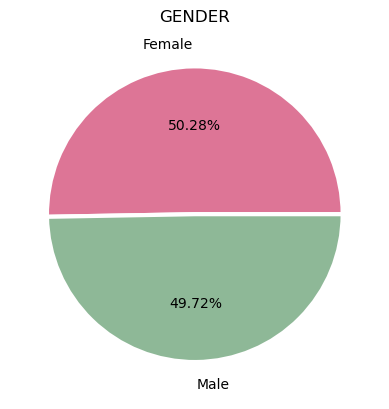

In [122]:
#Pie chart to display gender
colors = ['#DD7596', '#8EB897']#4F6272', '#B7C3F3'

plt.pie(gender_count, labels=gender_count.index,labeldistance=1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, colors=colors, autopct='%0.2f%%')
plt.title("GENDER")
plt.show()


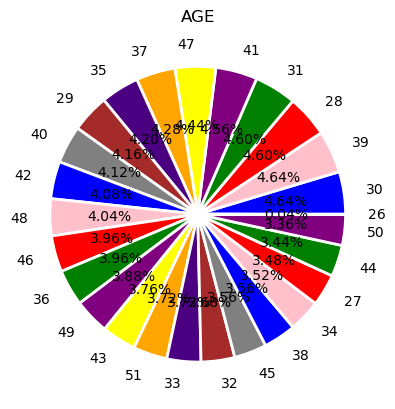

In [123]:
#Plot a pie chat to display ages of users
#colors = ['#DD7596', '#8EB897', #4F6272', '#B7C3F3']
colors = ["blue", "pink", "red", "green", "purple", "yellow", "orange", "indigo","brown", "grey"]       

plt.pie(age_count,labels=age_count.index,labeldistance=1.15, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' }, colors=colors, autopct='%0.2f%%')
plt.title('AGE')
plt.show()

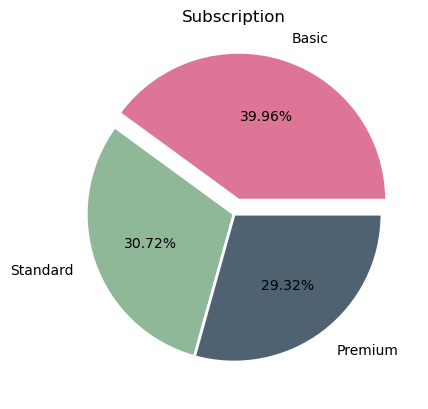

In [124]:
#Pie chart displaying subscription types and users
colors = ['#DD7596', '#8EB897','#4F6272']
explode= [0.1, 0, 0]
plt.pie(subscription_type,labels=subscription_type.index,labeldistance=1.15, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },explode=explode, colors=colors, autopct='%0.2f%%')
plt.title('Subscription')
plt.show()

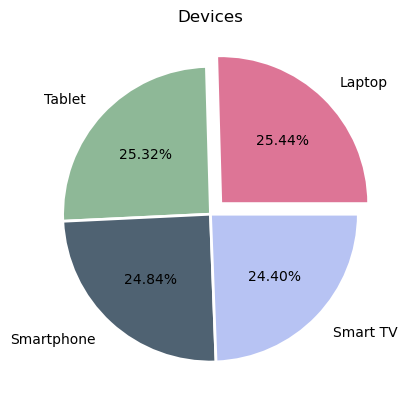

In [125]:
#Pie chart displaying various device usage
colors = ['#DD7596', '#8EB897','#4F6272', '#B7C3F3']
explode=[0.1, 0, 0, 0]
plt.pie(device_counts,labels=device_counts.index,labeldistance=1.15, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },explode=explode, colors=colors, autopct='%0.2f%%')
plt.title('Devices')
plt.show()

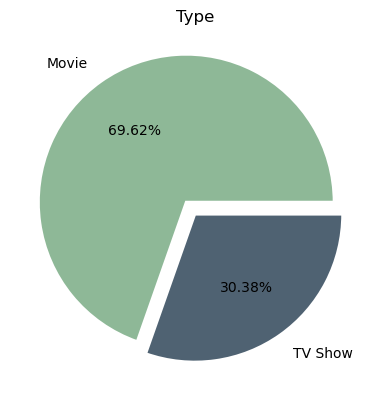

In [126]:
colors = ['#8EB897','#4F6272']
explode= [0.1, 0]
plt.pie(type,labels=type.index,labeldistance=1.15, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },explode=explode, colors=colors, autopct='%0.2f%%')
plt.title('Type')
plt.show()

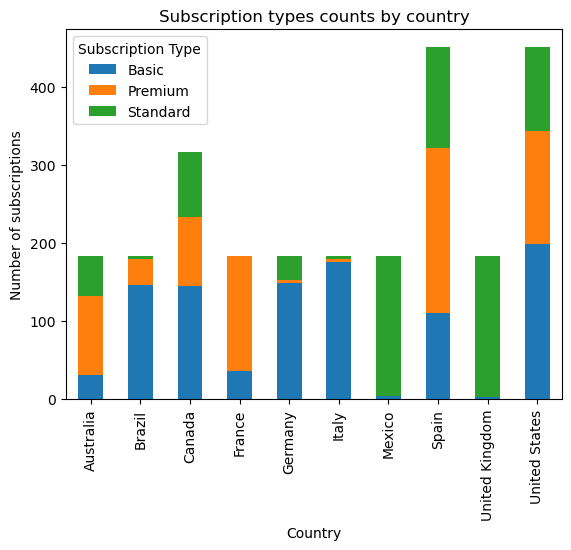

In [127]:
#Stacked bar chart displaying subscritons by countries
subscription_counts = df_2.groupby(['Country', 'Subscription Type'])['User ID'].count().unstack()
subscription_counts.plot(kind = 'bar',stacked = True)
plt.xlabel('Country')
plt.ylabel('Number of subscriptions')
plt.title('Subscription types counts by country')
plt.legend(title='Subscription Type')
plt.show()

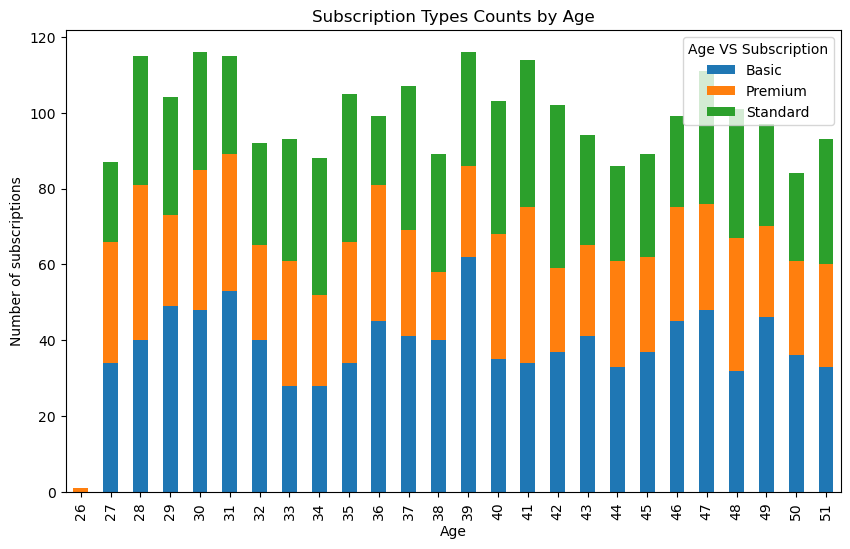

In [128]:
#Stacked bar chart displaying Subscription types by age
age_counts = df_2.groupby(['Age', 'Subscription Type'])['User ID'].count().unstack()
fig, ax = plt.subplots(figsize=(10, 6))  
age_counts.plot(kind='bar', stacked=True, ax=ax)

plt.xlabel('Age')
plt.ylabel('Number of subscriptions')
plt.title('Subscription Types Counts by Age')
plt.legend(title='Age VS Subscription')
plt.show()

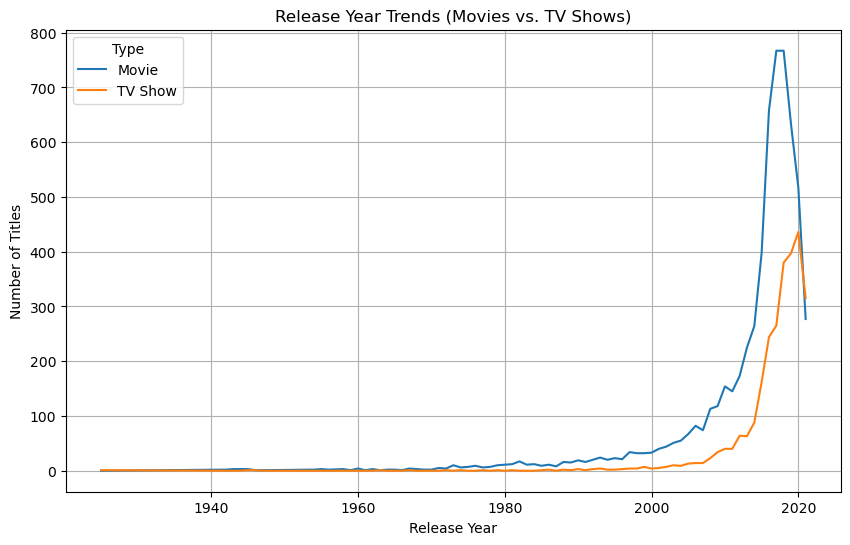

In [129]:
#Trends comparison between movies and tv shows over the past  decades

def plot_release_year_trends(titles_df):
 
  release_year_counts = titles_df.groupby(["Release Year", "Type"])["Title"].count().unstack(fill_value=0)

  # Configure the plot
  release_year_counts.plot(kind='line', figsize=(10, 6))
  plt.xlabel('Release Year')
  plt.ylabel('Number of Titles')
  plt.title('Release Year Trends (Movies vs. TV Shows)')
  plt.legend(title='Type')
  plt.grid(True)
  plt.show()

plot_release_year_trends(titles_df.copy())

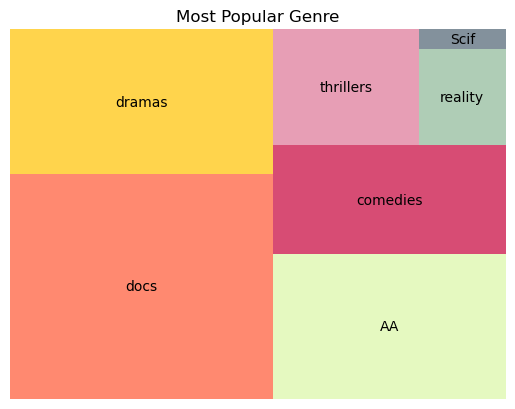

In [130]:
#import squarify
import squarify

#Tree map to show the most popular genre.

sizes = [700, 450, 400, 300, 200, 100, 20]
labels = ["docs", "dramas", "AA", "comedies", "thrillers", "reality", "Scif"]
colors = ['#FF5733', '#FFC300', '#DAF7A6', '#C70039', '#DD7596', '#8EB897','#4F6272']

squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.7)

plt.axis('off')
plt.title("Most Popular Genre")
plt.show()


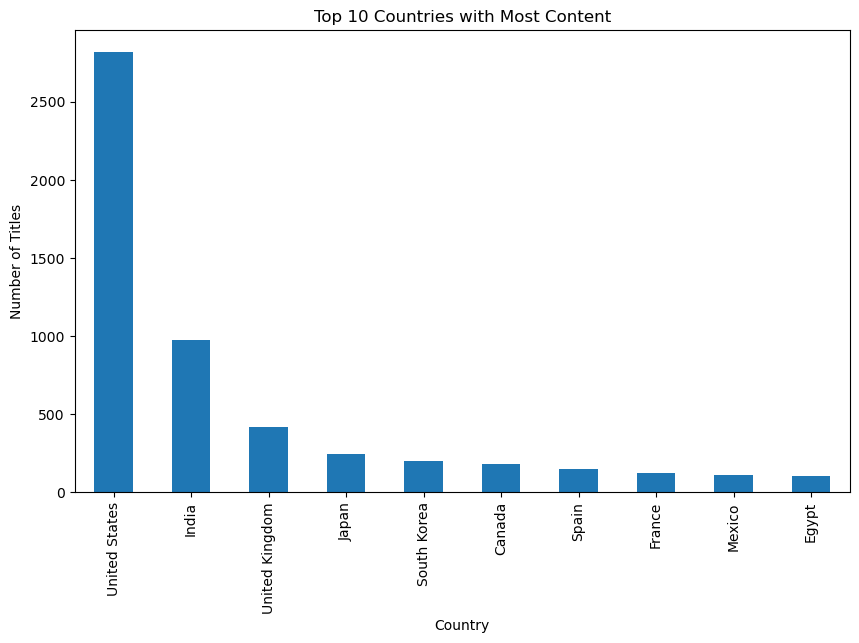

The top country with the most content is United States, which has 2818 titles, accounting for 32.00% of the total content.


In [131]:
# Top 10 countries with the most content
top_countries = titles_df["Country"].value_counts().head(10)
top_countries.plot(kind='bar', figsize=(10, 6))
plt.title("Top 10 Countries with Most Content")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.show()

# Calculate the total number of titles
total_titles = titles_df.shape[0]

# Calculate the number of titles for the top country
top_country = titles_df["Country"].value_counts().idxmax()
top_country_count = titles_df["Country"].value_counts().max()

# Compute the percentage
top_country_percentage = (top_country_count / total_titles) * 100

# Print the result
print(f"The top country with the most content is {top_country}, which has {top_country_count} titles, accounting for {top_country_percentage:.2f}% of the total content.")

C:\Users\lexis\AppData\Local\Temp\ipykernel_12912\3574625905.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_titles_df['Primary Genre'] = filtered_titles_df['Genre'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else x)


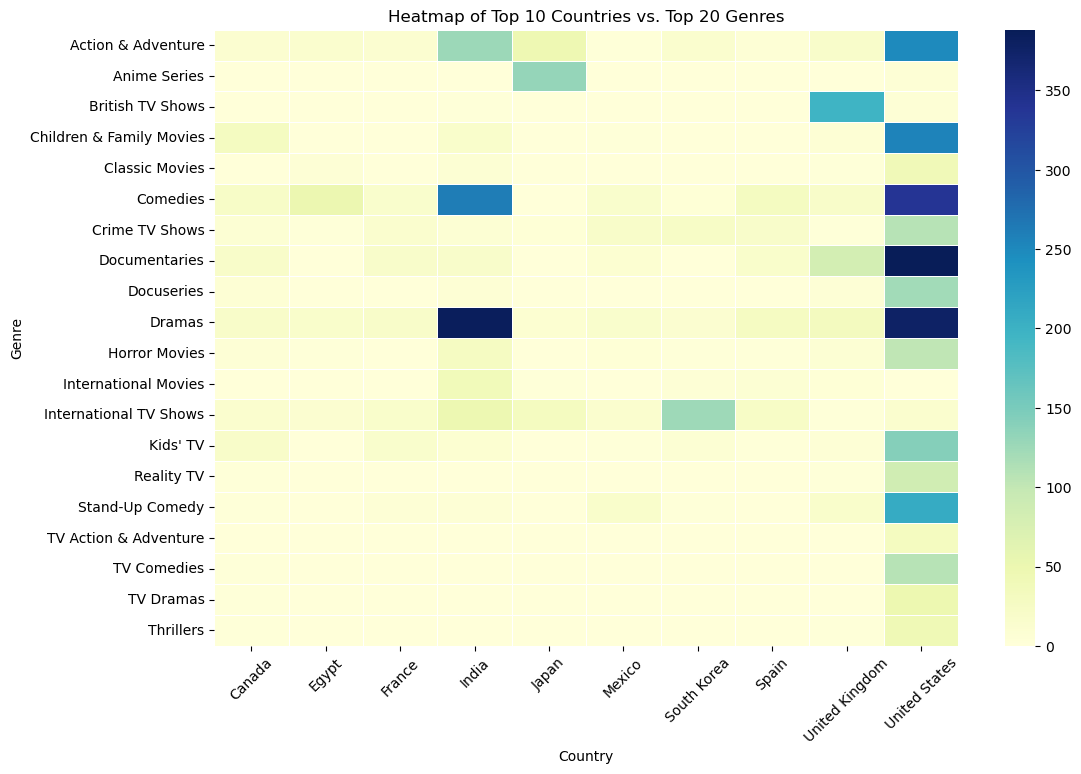

In [147]:
# Filter out rows with NaN values in 'Country' or 'Genre'
filtered_titles_df = titles_df.dropna(subset=['Country', 'Genre'])

# Aggregating Genres for simplification
filtered_titles_df['Primary Genre'] = filtered_titles_df['Genre'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else x)

# Identify the top 10 countries based on the number of titles
top_countries = filtered_titles_df['Country'].value_counts().head(10).index

# Identify the top 20 genres based on the number of titles
top_genres = filtered_titles_df['Primary Genre'].value_counts().head(20).index

# Filter the DataFrame to include only the top 10 countries and top 20 genres
filtered_df = filtered_titles_df[filtered_titles_df['Country'].isin(top_countries) & filtered_titles_df['Primary Genre'].isin(top_genres)]

# Create a pivot table for the heatmap
genre_country_pivot = filtered_df.pivot_table(index='Primary Genre', columns='Country', aggfunc='size', fill_value=0)

# Plot the heatmap without annotations
plt.figure(figsize=(12, 8))
sns.heatmap(genre_country_pivot, cmap='YlGnBu', annot=False, linewidths=.5)
plt.title('Heatmap of Top 10 Countries vs. Top 20 Genres')
plt.xlabel('Country')
plt.ylabel('Genre')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()